# Question 3: How do choices about data such as i) amount of training data and ii) balance of classes in a classification problem affect the performance of a neural network?

## Introduction

### Overview

In this final notebook we will look at how choices about the data affect the Neural Network's (NN) performance. I assume you have read and understood both the Question 1 and Question 2 notebooks before starting this one.

The first part of this will focus on chaning the ratio between the training, validation, and testing sets. In Question 2 I used a 64/16/20 split but here we will see what happens with a much smaller or larger training set. The second part will then focus on adjusting the weighting of the different classes to force the model to pay more or less attention to certain classes.

In order to do this easily, I have created a function stored in functions.py that wraps all the code from Question 2. It takes the following inputs:
- features
    - The feature data
- labels
    - The label data
- test_ratio=0.2
    - The amount of data used for testing
- val_ratio=0.2
    - The amount of data used for validation
- hidden_size=64
    - The side of the hidden layer
- num_epochs=20
    - The number of epochs
- batch_size=32
    - The batch size
- learning_rate=0.001
    - The learning rate
- use_class_weights=False
    - Whether or not to balance the classes so they have an equal affect on the loss

## Imports

In [1]:
import pandas as pd

## Initialising the Dataset

Let us load the same dataset used in question 2.

In [2]:
# Change the path to where the csv file is stored on your pc
path = "/Users/Ryan/Documents/Ryan's Documents/Uni/Year 4/Comp/Coursework 2/SDSS.csv"
data = pd.read_csv(path)
features = data[['u', 'g', 'r', 'i', 'z']]
labels = data['class']
features

,u,g,r,i,z
0,19.47406,17.04240,15.94699,15.50342,15.22531
1,18.66280,17.21449,16.67637,16.48922,16.39150
2,19.38298,18.19169,17.47428,17.08732,16.80125
3,17.76536,16.60272,16.16116,15.98233,15.90438
4,17.55025,16.26342,16.43869,16.55492,16.61326
...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570
9996,18.27255,17.43849,17.07692,16.71661,16.69897
9997,18.75818,17.77784,17.51872,17.43302,17.42048
9998,18.88287,17.91068,17.53152,17.36284,17.13988


## Loading the train_sdss_model function

In order to call functions from the functions.py file, we need to edit the path as below.

In [7]:
import os, sys
sys.path.append('../')
from functions import train_sdss_model, plot_cm, plot_loss

## Adjusting the Training/Validation/Testing ratios

Now we will call train_sdss_model function for different ratios.

In [6]:
# Same as Question 2 (Train/Val/Test = 64/16/20)
default_ratio = train_sdss_model(features, labels, 
                                       test_ratio=0.2, val_ratio=0.2, 
                                       num_epochs=20)

# Medium test ratio (Train/Val/Test = 48/12/40)
medium_ratio = train_sdss_model(features, labels, 
                                       test_ratio=0.4, val_ratio=0.2, 
                                       num_epochs=20)

# Higher test ratio (Train/Val/Test = 32/8/60)
higher_ratio = train_sdss_model(features, labels, 
                                       test_ratio=0.6, val_ratio=0.2, 
                                       num_epochs=20)

# Highest test ratio (Train/Val/Test = 16/4/80)
highest_ratio = train_sdss_model(features, labels, 
                                       test_ratio=0.8, val_ratio=0.2, 
                                       num_epochs=20)

Now lets compare how accuracte each one is.

In [14]:
print("Results with default ratio:")
print(default_ratio['classification_report'])

print("\nResults with medium ratio:")
print(medium_ratio['classification_report'])


Results with default ratio:
              precision    recall  f1-score   support

      GALAXY     0.9689    0.9398    0.9541       996
         QSO     0.8995    0.9421    0.9203       190
        STAR     0.9341    0.9582    0.9460       814

    accuracy                         0.9475      2000
   macro avg     0.9342    0.9467    0.9402      2000
weighted avg     0.9482    0.9475    0.9476      2000


Results with medium ratio:
              precision    recall  f1-score   support

      GALAXY     0.9694    0.9372    0.9530      1991
         QSO     0.9245    0.9321    0.9283       368
        STAR     0.9266    0.9622    0.9441      1641

    accuracy                         0.9470      4000
   macro avg     0.9402    0.9438    0.9418      4000
weighted avg     0.9477    0.9470    0.9471      4000



In [15]:
print("\nResults with higher ratio:")
print(higher_ratio['classification_report'])

print("\nResults with highest ratio:")
print(highest_ratio['classification_report'])


Results with higher ratio:
              precision    recall  f1-score   support

      GALAXY     0.9764    0.9104    0.9423      3003
         QSO     0.9091    0.9040    0.9065       531
        STAR     0.9049    0.9805    0.9412      2466

    accuracy                         0.9387      6000
   macro avg     0.9302    0.9316    0.9300      6000
weighted avg     0.9411    0.9387    0.9387      6000


Results with highest ratio:
              precision    recall  f1-score   support

      GALAXY     0.9617    0.9143    0.9374      3980
         QSO     0.9425    0.8223    0.8783       698
        STAR     0.8955    0.9723    0.9323      3322

    accuracy                         0.9304      8000
   macro avg     0.9332    0.9030    0.9160      8000
weighted avg     0.9325    0.9304    0.9301      8000



As you can see the overall accuracy doesn't really change that much. The default ratio had the best accuracy at 94.75% but the highest ratio was only 1.71% lower. The real probelem between them is that the lower the training set the more underfit the data is. This is more easily seen by the fact that the f1-score for QSO (the minority class) drops from 0.9203 to 0.8783 and the recall drops even lower from 0.9421 to 0.8223. While these numbers are still relatively high, the big drop shows that the models with less training data are clearly less accurate overall.

If we plot the loss curves for each ratio, we can also see that the loss doesn't converge as well, and the shapes are less smooth, for the higher ratios.

Confusion matrix with default ratio:


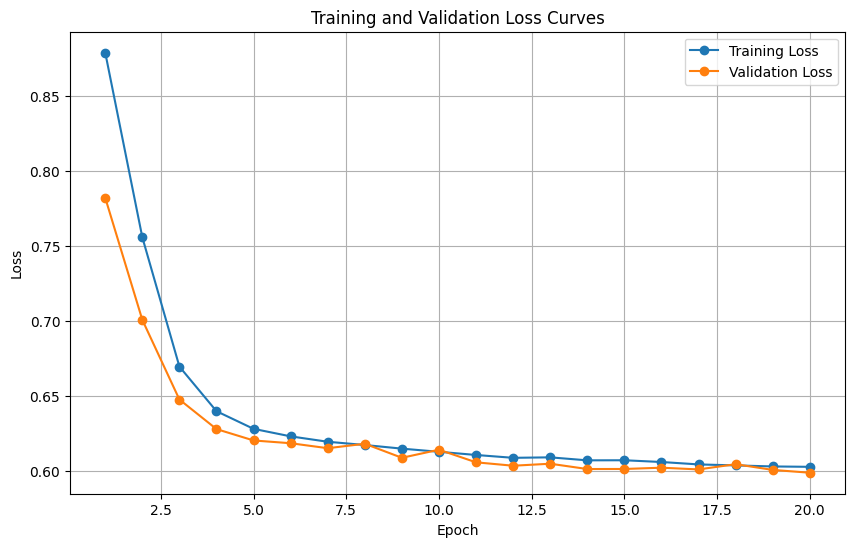


Confusion matrix with medium ratio:


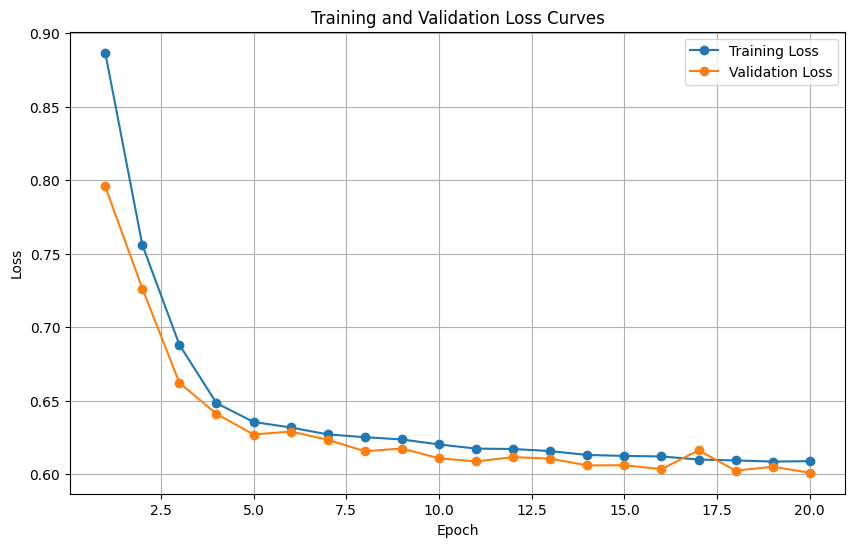


Confusion matrix with higher ratio:


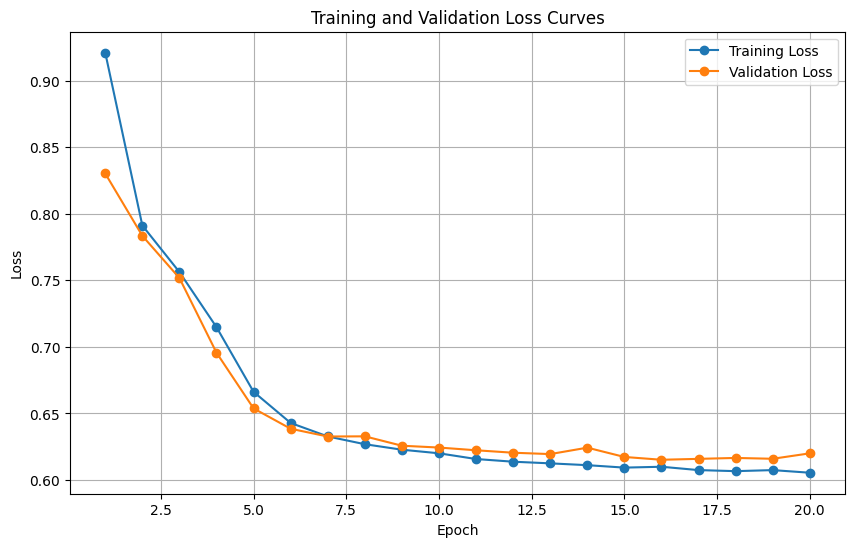


Confusion matrix with highest ratio:


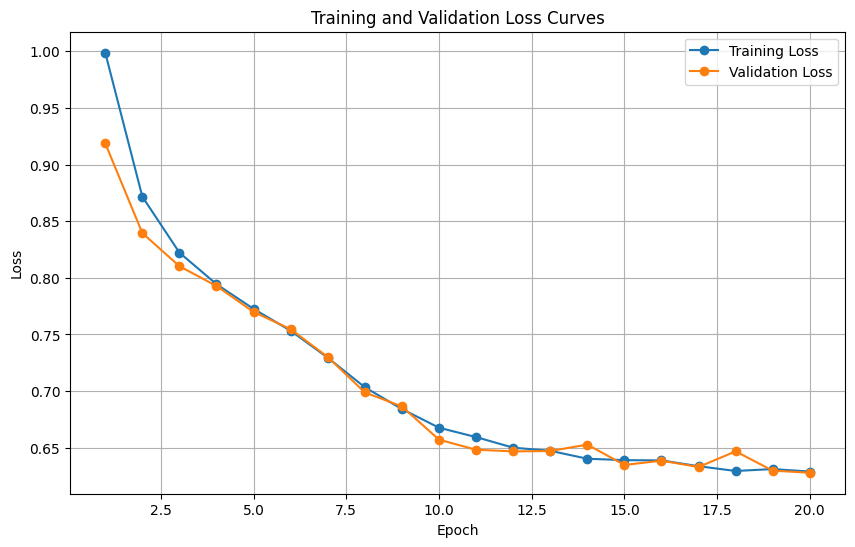

In [19]:
print("Confusion matrix with default ratio:")
plot_loss(default_ratio['train_loss_history'], default_ratio['val_loss_history'],)

print("\nConfusion matrix with medium ratio:")
plot_loss(medium_ratio['train_loss_history'], medium_ratio['val_loss_history'],)

print("\nConfusion matrix with higher ratio:")
plot_loss(higher_ratio['train_loss_history'], higher_ratio['val_loss_history'],)

print("\nConfusion matrix with highest ratio:")
plot_loss(highest_ratio['train_loss_history'], highest_ratio['val_loss_history'],)